## Task 1: Exploratory Data Analysis (EDA) and Business Insights


In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Importing the dataset
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [11]:
# Info of the dataset
customers.info("\n")
print("\n")
products.info()
print("\n")
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  ----

In [18]:
# Checking for missing values
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [16]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [17]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

# Business insights from EDA

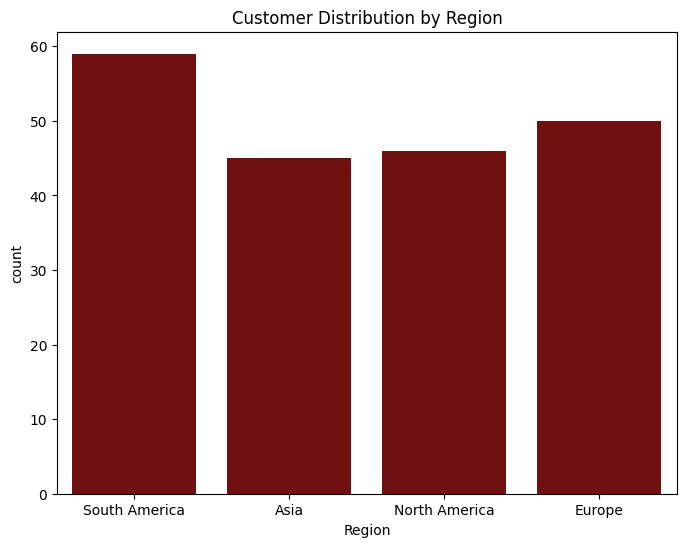

In [111]:
# Customer Distribution by Region
plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x='Region', color="maroon")
plt.title("Customer Distribution by Region")
plt.show()

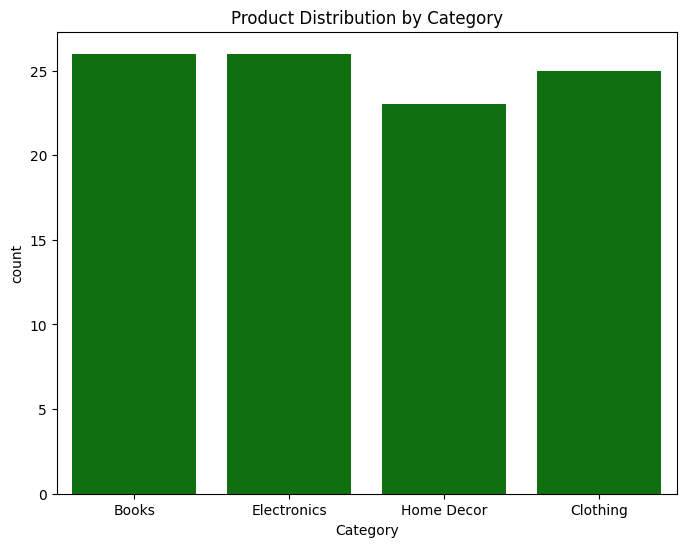

In [107]:
# Product Distribution by Category
plt.figure(figsize=(8, 6))
sns.countplot(data=products, x='Category', color='green')
plt.title("Product Distribution by Category")
plt.show()

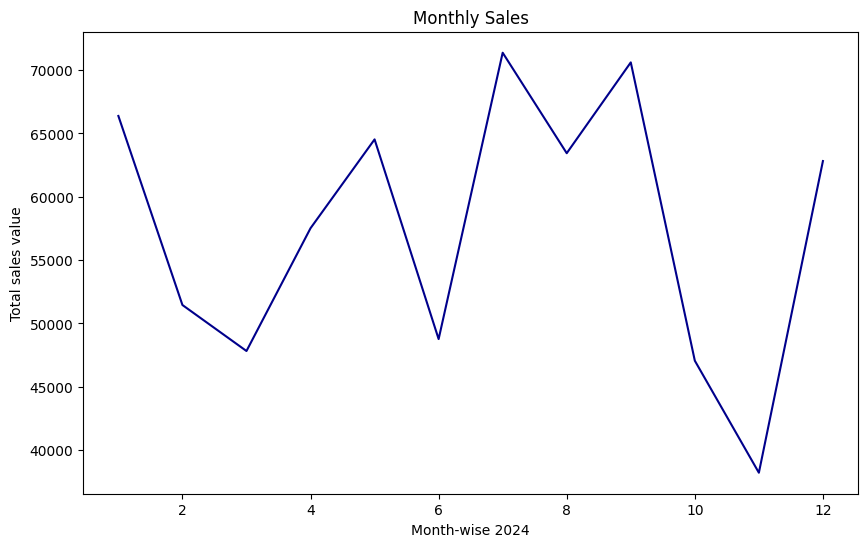

In [113]:
# Monthly sales
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.month
monthly_sales = transactions.groupby('Month')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='TotalValue', color='darkblue')
plt.xlabel("Month-wise 2024")
plt.ylabel("Total sales value")
plt.title("Monthly Sales")
plt.show()

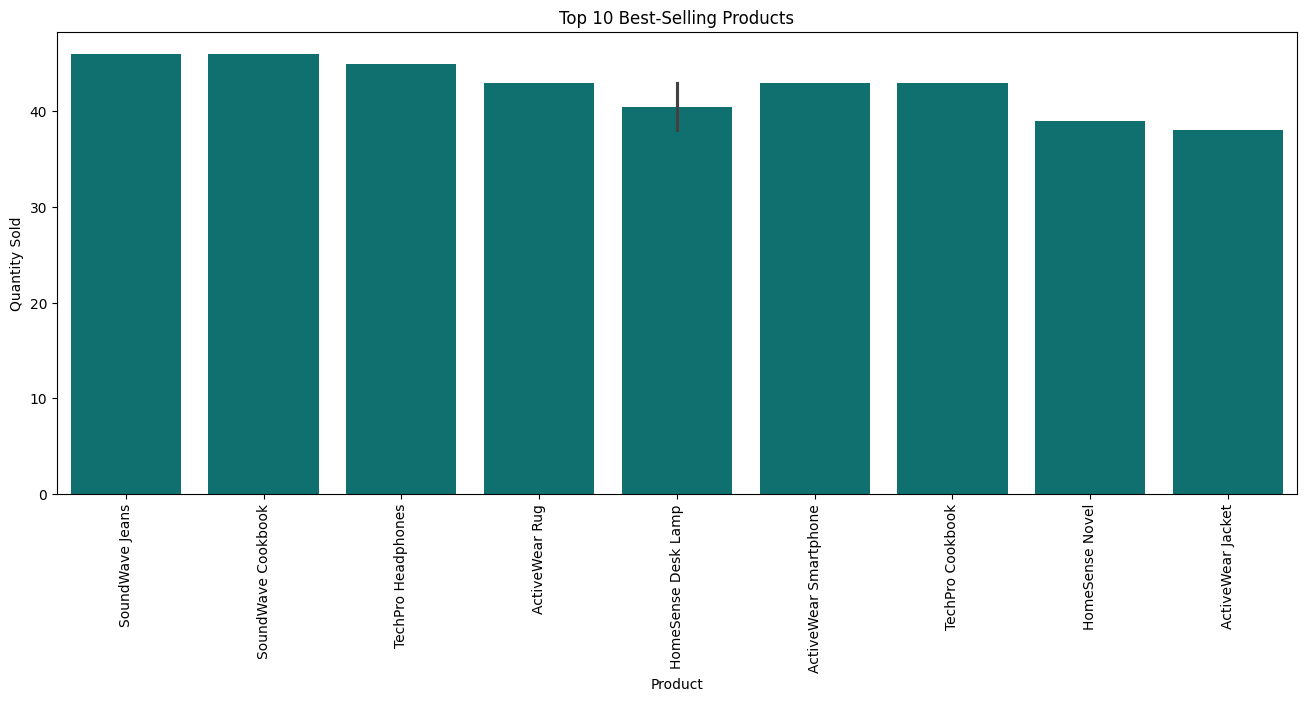

In [116]:
# Top 10 Best-Selling Products
productsalesbyid = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
productsalesbyname = products.set_index('ProductID').loc[productsalesbyid.index].reset_index()
productsalesbyname['Quantity'] = productsalesbyid.values
plt.figure(figsize=(16, 6))
sns.barplot(x=productsalesbyname.head(10)['ProductName'], y=productsalesbyname.head(10)['Quantity'], color='teal')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=90)
plt.show()

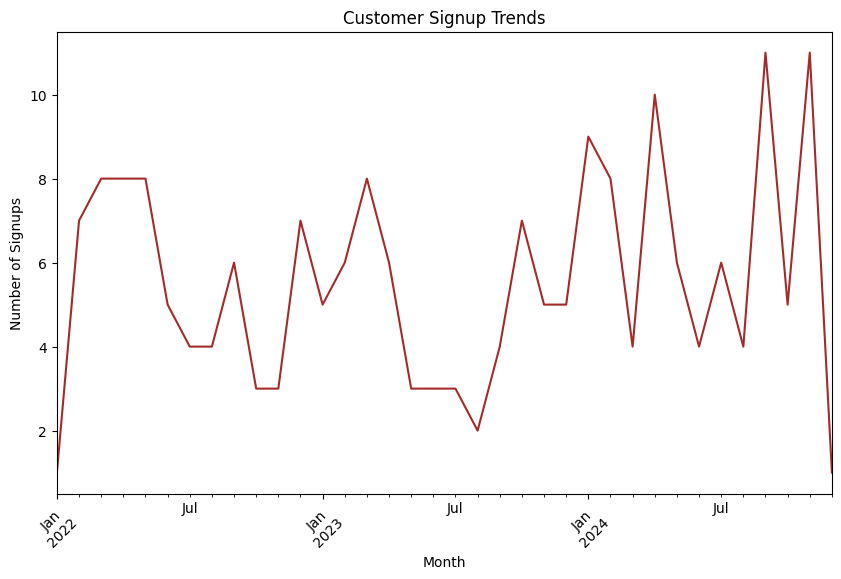

In [121]:
# Customer Signup Trends
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers['SignupMonth'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
signup_trends.plot(kind="line", color='brown')
plt.title("Customer Signup Trends")
plt.xlabel("Month")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.show()